# Digits Classification
sklearn tutorial for digits classification.

## Toy Example

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape", digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.953333333333


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


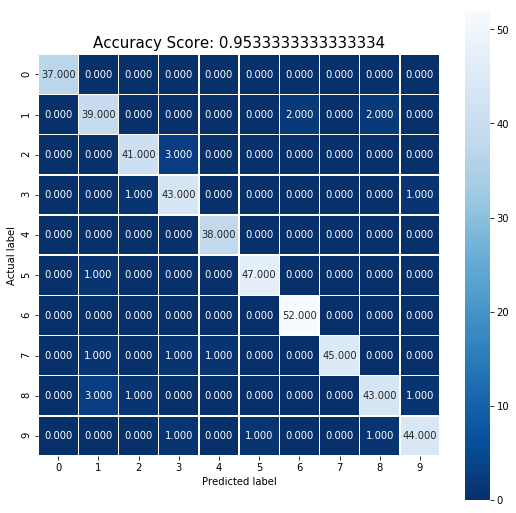

In [4]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## MNIST Dataset

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


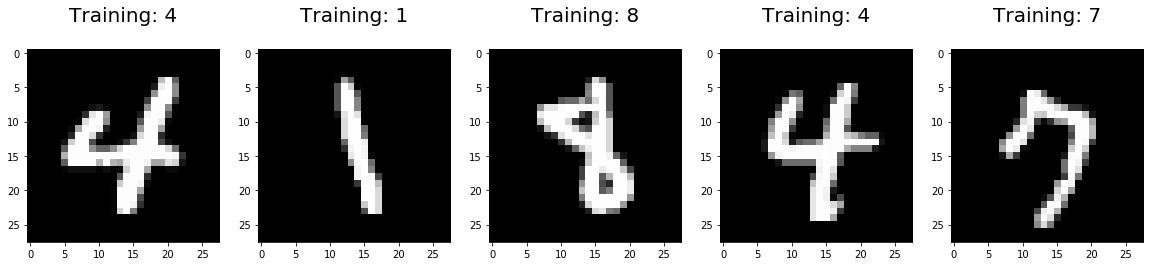

In [9]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [10]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9131


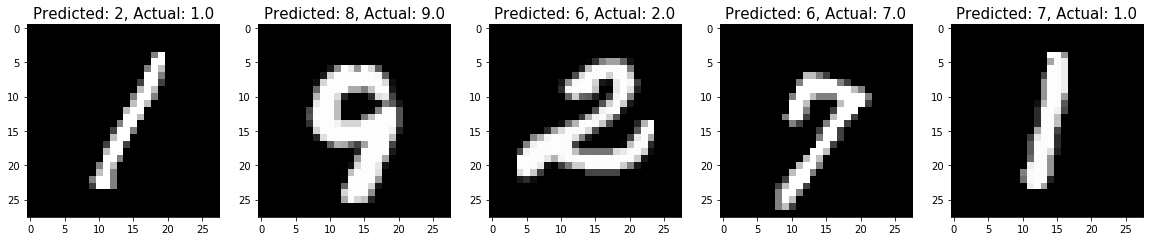

In [11]:
misclassifiedIndexes = []
for index, (label, predict) in enumerate(zip(test_lbl, predictions)):
    if label != predict: 
        misclassifiedIndexes.append(index)
        
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

## Comparing With Different Classifiers

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Use validation dataset and draw a learning curves for different classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier

# Toy example
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.model_selection import ShuffleSplit # not k-fold, takes a random validation set for each iter
# but, we can also use cv = ShuffleSplit(...) instead of cv = 10.

# Assuming that we don't have a separate test data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=0)

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
# Check for label imbalance and balance the dataset if necessary


In [6]:
from sklearn.metrics import f1_score # average parameter is required for multilabel targets: 
# if 'None' the scores for each label is returned; if 'weighted' average score weighted by support 
# (the true instances for each label) is returend.

# For generic cross validation evaluation
from sklearn.model_selection import cross_val_score # uses k-fold CV by default
# scoring parameter can take 'f1_weighted' for classification and 'neg_mean_squared_error' for regression

lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()

print( 'lr cross-validation f1_score: %.3f'%np.mean(cross_val_score(lr, x_train, y_train, cv=cv, scoring='f1_weighted')) )
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)
print( 'lr testing f1_score: %.3f'%f1_score(y_test, lr_preds, average='weighted'))
print( 'rf cross-validation f1_score: %.3f'%np.mean(cross_val_score(rf, x_train, y_train, cv=cv, scoring='f1_weighted')) )
rf.fit(x_train, y_train)
rf_preds = rf.predict(x_test)
print( 'rf testing f1_score: %.3f'%f1_score(y_test, rf_preds, average='weighted'))
print( 'xgb cross-validation f1_score: %.3f'%np.mean(cross_val_score(xgb, x_train, y_train, cv=cv, scoring='f1_weighted')) )
xgb.fit(x_train, y_train)
xgb_preds = xgb.predict(x_test)
print( 'xgb testing f1_score: %.3f'%f1_score(y_test, xgb_preds, average='weighted'))
print( 'gbc cross-validation f1_score: %.3f'%np.mean(cross_val_score(gbc, x_train, y_train, cv=cv, scoring='f1_weighted')) )
gbc.fit(x_train, y_train)
gbc_preds = gbc.predict(x_test)
print( 'gbc testing f1_score: %.3f'%f1_score(y_test, gbc_preds, average='weighted'))

lr cross-validation f1_score: 0.961
lr testing f1_score: 0.950
rf cross-validation f1_score: 0.944
rf testing f1_score: 0.928
xgb cross-validation f1_score: 0.967
xgb testing f1_score: 0.958
gbc cross-validation f1_score: 0.963
gbc testing f1_score: 0.964


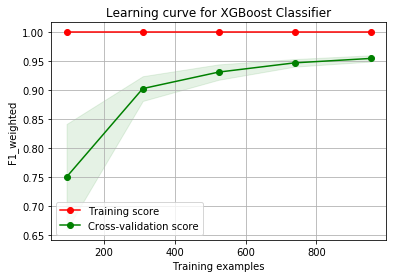

In [27]:
# For plotting learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit # not k-fold, takes a random validation set for each iter
# but, we can also use cv = ShuffleSplit(...) instead of cv = 10.

plt.figure()
plt.title('Learning curve for XGBoost Classifier')
plt.xlabel("Training examples")
plt.ylabel("F1_weighted")
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(), x_train, y_train, 
                                                        n_jobs=4, train_sizes=np.linspace(.1,1.0,5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

### Manual XGB Tuning
Reference: Complete Guide to Parameter Tuning in XGBoost (with codes in Python) @ https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### Real Data (MNIST)
Evaluating a vanilla XGBClassifier on a real (larger) dataset; this takes a while to plot a learning curve (including cross validation); this is why we need a scalable model selection--an efficient/smarter way to tune the model.

In [7]:
# Real example (MNIST)
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import ShuffleSplit
mnist = fetch_mldata('MNIST original')

x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)

In [10]:
print( 'xgb cross-validation f1_score: %.3f'%np.mean(cross_val_score(xgb, x_train, y_train, cv=cv, scoring='f1_weighted')) )
xgb.fit(x_train, y_train)
xgb_preds = xgb.predict(x_test)
print( 'xgb testing f1_score: %.3f'%f1_score(y_test, xgb_preds, average='weighted'))

NameError: name 'cross_val_score' is not defined

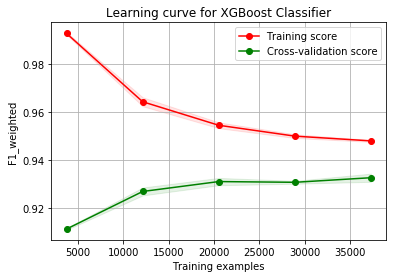

In [30]:
# For plotting learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit # not k-fold, takes a random validation set for each iter
# but, we can also use cv = ShuffleSplit(...) instead of cv = 10.

plt.figure()
plt.title('Learning curve for XGBoost Classifier')
plt.xlabel("Training examples")
plt.ylabel("F1_weighted")
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(), x_train, y_train, 
                                                        n_jobs=4, train_sizes=np.linspace(.1,1.0,5))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")

## Scalable Model Selection
Sampling and parallelization for random search. XGBoost Classifier was too slow anyhow with sampling and multi-threading.

### Tuning with Full-Data CV

In [ ]:
from scipy.stats import randint, uniform

lr_params = {"C": [1, 1e3, 1e5]}
rf_param_dist = {"max_depth": [3, None],
                 "n_estimators": [10, 100, 200, 500, 1000],
                 "max_features": [None, 0.2, 0.3, 0.5], #None defaults to 'auto'
                 "min_samples_split": randint(2, 101),
                 "min_samples_leaf": randint(1, 500),
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"],
                 "oob_score": [True, False],
                 "n_jobs": [-1]}
xgb_param_dist = {"max_depth": randint(3,11),
                  "learning_rate": [0.2, 0.1, 0.03, 0.01],
                  "n_estimators": [10, 100, 200, 500, 1000],
                  "n_jobs": [-1],
                  "gamma": randint(0,11),
                  "min_child_weight": randint(1,11),
                  "subsample": [0.5, 1],
                  "colsample_bylevel": [0.5, 1],
                  "reg_lambda": randint(1,100)
                  }

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
lr_grid_search = GridSearchCV(LogisticRegression(), scoring='f1_weighted', cv=5, n_jobs=4,
                              param_grid=lr_params)

n_iter_search = 30
rf_random_search = RandomizedSearchCV(RandomForestClassifier(), scoring='f1_weighted', cv=5, n_jobs=-1,
                                      param_distributions=rf_param_dist, n_iter=n_iter_search)

#xgb_random_search = RandomizedSearchCV(XGBClassifier(), scoring='f1_weighted', cv=5, n_jobs=-1,
#                                      param_distributions=xgb_param_dist, n_iter=n_iter_search)

from time import time
start = time()
lr_grid_search.fit(x_train, y_train)
print('lr_grid_search took %s'%(time()-start))
start = time()
rf_random_search.fit(x_train, y_train)
print('rf_random_search took %s'%(time()-start))
#start = time()
#xgb_random_search.fit(x_train, y_train)
#print('xgb_random_search took %s'%(time()-start))

In [12]:
print(rf_random_search.best_estimator_, '\nBest CV F1 score: ', rf_random_search.best_score_, '\n')
rf_preds = rf_random_search.predict(x_test)
print( 'rf testing f1_score: %.3f'%f1_score(y_test, rf_preds, average='weighted'))
print('\n')
#print(xgb_random_search.best_estimator_, '\nBest CV F1 score: ', xgb_random_search.best_score_, '\n')
#xgb_preds = xgb_random_search.predict(x_test)
#print( 'xgb testing f1_score: %.3f'%f1_score(y_test, xgb_preds, average='weighted'))

NameError: name 'rf_random_search' is not defined

### Tuning with Sample-Data CV

In [11]:
import pandas as pd
df_x_train = pd.DataFrame(x_train)
df_x_train['y'] = y_train
sample = df_x_train.sample(frac=0.5)
sx_train = sample.iloc[:,:-1]
sy_train = sample.iloc[:,-1]

start = time()
rf_random_search.fit(sx_train, sy_train)
print('rf_random_search took %s'%(time()-start))

rf_random_search took 87.57625102996826
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 
Best CV F1 score:  0.943820806492 

rf testing f1_score: 0.946


In [ ]:
print(rf_random_search.best_estimator_, '\nBest CV F1 score: ', rf_random_search.best_score_, '\n')
rf_preds = rf_random_search.predict(x_test)
print( 'rf testing f1_score: %.3f'%f1_score(y_test, rf_preds, average='weighted'))

## Tuning with Custom Library

In [1]:
# Real example (MNIST)
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from util.custom_lib import *
import warnings
warnings.filterwarnings('ignore')

mnist = fetch_mldata('MNIST original')
#from sklearn.datasets import load_digits
#mnist = load_digits()

In [2]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

In [4]:
scaler = StandardScaler()
x_train_ = scaler.fit_transform(x_train)
x_test_ = scaler.transform(x_test)

pca = PCA(.99)
x_train_ = pca.fit_transform(x_train_)
x_test_ = pca.fit(x_test_)

print(x_train_.shape)

(56000, 541)


In [3]:
df_x_train = pd.DataFrame(x_train, dtype='float')
df_x_test = pd.DataFrame(x_test, dtype='float')

dw = DataWrangler()
# numeric feature scaling
## we only have numeric features
df_x_train, scaler = dw.scale_numeric_columns(df_x_train)
df_x_test = pd.DataFrame(scaler.transform(df_x_test), dtype='float')
# PCA to speed up learning
print('before PCA shapes', df_x_train.shape, df_x_test.shape)
df_x_train, df_x_test = dw.reduce_dimensions(df_x_train, df_x_test)
print('after PCA shapes', df_x_train.shape, df_x_test.shape)

df_x_train['y'] = y_train
sample = df_x_train.sample(frac=0.1)

df_x_train = sample.iloc[:,:-1]
df_y_train = sample.iloc[:,-1]

df_x_test['y'] = y_test
sample = df_x_test.sample(frac=0.1)
df_x_test = sample.iloc[:,:-1]
df_y_test = sample.iloc[:,-1]

print('after sampling', df_x_train.shape, df_x_test.shape)

before PCA shapes (56000, 784) (14000, 784)
after PCA shapes (56000, 541) (14000, 541)
after sampling (5600, 541) (1400, 541)


In [ ]:
tuner = Pipeliner()
model = tuner.curate_pipeline(df_x_train.as_matrix(), df_y_train.as_matrix(), budget=30, cv=1)
#model = tuner.random_forest_search(df_x_train.as_matrix(), df_y_train.as_matrix(), budget=30, cv=3)

In [11]:
#x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=0)

model.fit(x_train, y_train)

NameError: name 'model' is not defined

In [14]:
viz = VisualAnalyzer()
plt = viz.plot_learning_curve(model, x_train, y_train)
plt.show()

KeyboardInterrupt: 

In [5]:
y_preds = model.predict(x_test)
cm = viz.plt_confusion_matrix(y_test, y_preds)
print(cm)

[[1281    0    6    1    1    4    8    0   10    1]
 [   0 1557   11    9    3    4    2    8    7    3]
 [   6    5 1252   12   12    6   19   12   20    4]
 [   3    3   30 1311    2   31    1   12   23   11]
 [   5    2    6    2 1266    2   11    6   10   52]
 [   9   12    4   25    6 1170   26    4   15    9]
 [  12    2    6    0    6   13 1348    1    8    1]
 [   3    1   35    7   10    1    1 1377    3   23]
 [   6   11   19   15   12   15   16    4 1270   22]
 [  14    5   11   27   41   11    3   19    9 1279]]
